## To do the RFM analysis and customer segmentation based on the analysis.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

https://www.kdnuggets.com/2019/05/golden-goose-cohort-analysis.html/2

In [50]:
v_source= "Online Retail-1.xlsx"
## Read the data first 
retail_df=pd.read_excel(v_source)


In [51]:
retail_df=retail_df.replace('?',np.NAN)

In [53]:
retail_df.shape

(531278, 8)

In [55]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
1,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
2,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom


In [56]:
## Invoice number, Lets see how many distinct values we have and see if we have any duplicate invoice numbers.
print('Total unique invoice numbers are ',retail_df.InvoiceNo.nunique())
## This means invoices are not unique and so lets see what is there when we have duplicate invoice numbers.

Total unique invoice numbers are  20722


In [61]:
V_zero_unit_price_idx=retail_df['UnitPrice'][retail_df.UnitPrice==0].index

In [62]:
V_zero_unit_price_idx=retail_df['UnitPrice'][retail_df.UnitPrice==0].index
print('No of rows where unit price is 0 is ',V_zero_unit_price_idx.shape[0])
print('shape before dropping 0 unit price rows ',retail_df.shape)
retail_df=retail_df.drop(index=V_zero_unit_price_idx)
print('shape After  dropping 0 unit price rows ',retail_df.shape)

No of rows where unit price is 0 is  1176
shape before dropping 0 unit price rows  (531278, 8)
shape After  dropping 0 unit price rows  (530102, 8)


In [63]:
V_junk_cust_inx=retail_df[retail_df.CustomerID.isnull()==True].index
retail_df=retail_df.drop(index=V_junk_cust_inx)
print('shape after removing junk customers',retail_df.shape[0])

shape after removing junk customers 397880


In [64]:
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
1,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
2,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom


In [65]:
## Adding few columns 
retail_df['Amount']=retail_df['UnitPrice']*retail_df['Quantity']
retail_df['Trx_year']=retail_df.InvoiceDate.dt.year
retail_df['Trx_mth']=retail_df.InvoiceDate.dt.month
retail_df['Trx_period']=retail_df.Trx_year.astype(str)+str('-')+retail_df.Trx_mth.astype(str)

In [66]:
retail_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Trx_year,Trx_mth,Trx_period
0,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,3202.92,2011,2,2011-2
1,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom,191.16,2011,7,2011-7
2,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40,2011,1,2011-1
3,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,6539.40,2011,4,2011-4
6,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom,960.00,2011,11,2011-11


In [ ]:
retail_df.InvoiceDate.dt.year

In [67]:
## Top 5 Expensive items.
retail_df.sort_values(by='UnitPrice',ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Trx_year,Trx_mth,Trx_period
434219,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75,2011,5,2011-5
496314,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France,4161.06,2011,10,2011-10
496313,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France,4161.06,2011,10,2011-10
492347,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore,3949.32,2011,10,2011-10
484656,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom,3155.95,2011,10,2011-10
466934,562946,M,Manual,1,2011-08-11 09:38:00,2500.00,15581.0,United Kingdom,2500.00,2011,8,2011-8
426588,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore,2382.92,2011,4,2011-4
492348,571751,M,Manual,1,2011-10-19 11:18:00,2118.74,12744.0,Singapore,2118.74,2011,10,2011-10
426591,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore,2053.07,2011,4,2011-4
477588,566927,M,Manual,1,2011-09-15 15:20:00,2033.10,17846.0,United Kingdom,2033.10,2011,9,2011-9


In [68]:
## Unit price loosk to have a good fluctuation, 75% percentile is achieved at 3.75 where as max value oid 8142.75.
retail_df['UnitPrice'].describe()

count    397880.000000
mean          3.116509
std          22.097987
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

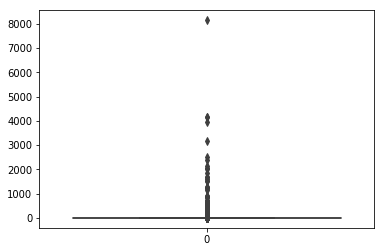

In [69]:
sns.boxplot(data=retail_df['UnitPrice'])

In [ ]:
plt.boxplot(retail_df['UnitPrice'])

/Users/skirar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


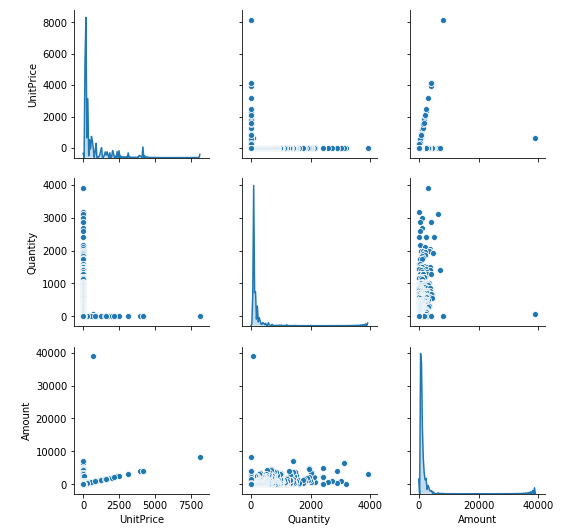

In [11]:
sns.pairplot(retail_df[['UnitPrice','Quantity','Amount']],diag_kind='kde')

In [ ]:
## for lower unit price there are items ordered with greater QTY but for high unit proce, the QTY is very less 
## so this can be concluded that high priced items are bought in lesser QTY.

## There is a long tail in Unit price , it means there is one or two items which are exceptionally costly than others.


In [ ]:
## Lets see how the trading is done over a period of time, we want to know  the distribution of invoices over a period of time.

In [71]:
retail_df.groupby('Trx_period')['Amount'].agg(['mean','sum','min','max','median'])
##['MILES*'].agg(['mean','sum','min','max','median'])

,mean,sum,min,max,median
Trx_period,,,,,
2010-12,21.895244,572713.890,0.140,3828.00,10.50
2011-1,23.189252,492261.440,0.190,6539.40,12.60
2011-10,20.953540,1038310.790,0.120,4992.00,10.50
2011-11,18.004019,1161817.380,0.060,3651.60,9.87
2011-12,20.211708,349723.190,0.120,3861.00,9.90
2011-2,22.438769,447137.350,0.180,3215.52,12.75
2011-3,21.913551,595500.760,0.190,2076.80,12.60
2011-4,20.722567,469200.361,0.001,6539.40,12.60
2011-5,23.853193,675498.560,0.190,8142.75,14.85


In [ ]:
## amount is coming as 0.001 , need to see these rows 
np.sum(retail_df.Amount<1)
##8661650.703999994

In [ ]:
retail_df['Trx_year'].value_counts()

In [ ]:

##cat(retail_df.Trx_mth.astype(str))

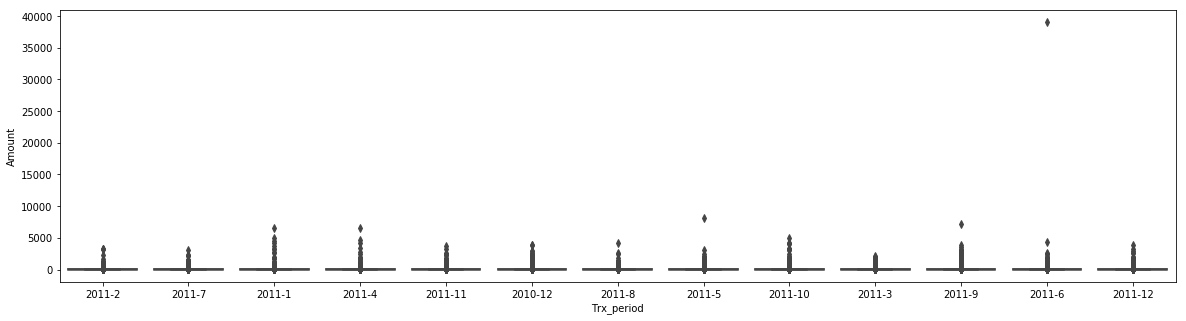

In [72]:
## Lets se how the Values have faired 
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot('Trx_period','Amount',data=retail_df)
## by looking ito the below we can see that there is an outlier in the amount, in th elast 12 months 
## not even a close by sale has done so lets see the proportionate QTY.

In [73]:
def q3(x):
    return x.quantile(0.75)

In [74]:
def q1(x):
    return x.quantile(0.25)

In [75]:
def q87(x):
    return x.quantile(0.87)

In [76]:
ret_monetory_df=pd.DataFrame(
    retail_df.groupby('CustomerID')['Amount'].agg([
    'count','sum','mean','median','min',q1,q3,q87,'max','std'
    ]))

In [77]:
ret_monetory_df.reset_index(level=0, inplace=True)

In [80]:
ret_monetory_df.sort_values(by='count',ascending=False)

,CustomerID,count,sum,mean,median,min,q1,q3,q87,max,std
4008,17841.0,7847,40991.57,5.223852,2.95,0.29,1.650,5.900,9.7524,349.50,9.941529
1877,14911.0,5675,143825.06,25.343623,17.00,1.45,13.520,24.750,35.7000,1687.17,44.516979
1287,14096.0,5111,65164.79,12.749910,5.79,0.42,3.260,12.390,19.7400,1599.26,52.558836
325,12748.0,4595,33719.73,7.338353,3.35,0.06,1.650,7.500,11.5780,850.50,21.786541
1659,14606.0,2700,12156.65,4.502463,2.55,0.12,1.250,5.000,8.3000,139.30,7.216007
2174,15311.0,2379,60767.90,25.543464,5.95,0.21,2.575,15.000,72.0000,408.00,46.526192
1687,14646.0,2076,280206.02,134.973998,105.60,0.39,51.840,177.600,241.0200,4992.00,170.094307
561,13089.0,1818,58825.83,32.357442,19.92,4.56,15.000,35.400,58.0000,788.40,40.437124
688,13263.0,1677,7454.07,4.444884,3.30,0.19,1.700,5.900,8.2500,122.40,4.819828
1432,14298.0,1637,51527.30,31.476665,23.20,0.19,15.000,36.000,49.9200,650.25,32.536490


In [81]:
## Lets see how customers can be seggregated based on the amounts ( Monetory Analysis).
##1. Find out how amounts are distributed over customers.
## Lets print the unique customers 
print('Total unique customers are',retail_df.CustomerID.nunique())
retail_df.groupby('CustomerID')['Amount'].agg([
    'count','sum','mean','median','min',q1,q3,q87,'max','std'
])

Total unique customers are 4336


,count,sum,mean,median,min,q1,q3,q87,max,std
CustomerID,,,,,,,,,,
12347.0,182,4310.00,23.681319,17.00,5.04,13.2000,25.1400,35.4000,249.60,23.289902
12348.0,31,1797.24,57.975484,41.76,13.20,39.6000,60.0000,105.9600,240.00,48.514857
12349.0,73,1757.55,24.076027,17.70,6.64,14.8500,20.2800,30.8544,300.00,34.655913
12350.0,17,334.40,19.670588,19.80,8.50,15.0000,25.2000,25.2000,40.00,7.275538
12352.0,85,2506.04,29.482824,17.70,9.90,15.0000,19.8000,30.1820,376.50,51.687900
12353.0,4,89.00,22.250000,18.80,11.60,16.1750,24.8750,32.0390,39.80,12.215427
12354.0,58,1079.40,18.610345,16.95,8.50,14.9625,19.9000,23.4000,54.08,8.679742
12355.0,13,459.40,35.338462,25.50,17.70,19.8000,30.0000,55.1760,120.00,29.703522
12356.0,59,2811.43,47.651356,34.80,3.75,19.9800,60.0000,79.5768,324.00,48.572297


In [82]:
retail_df[retail_df.CustomerID==15098.0]
## we are safe to drop the outlier , we can see the QTY as 60 for the unit Price 649 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Trx_year,Trx_mth,Trx_period
11753,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098.0,United Kingdom,297.0,2011,6,2011-6
11754,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,38970.0,2011,6,2011-6
446671,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098.0,United Kingdom,649.5,2011,6,2011-6


In [83]:
retail_df=retail_df.drop(index=11754)

In [ ]:
## Lets se how the Values have faired after dropping the outlier
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot('Trx_period','Amount',data=retail_df)

AxesSubplot(0.125,0.125;0.775x0.755)


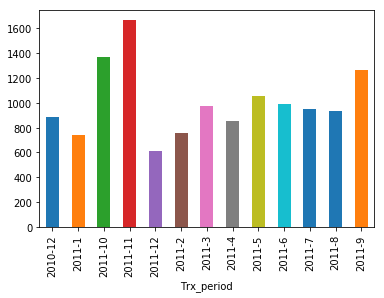

In [84]:
## The below bar shows that in the month of OCT and Nov 2011 There was a high customer foot fall 
print(retail_df.groupby('Trx_period')['CustomerID'].nunique().plot.bar())

In [ ]:
retail_df.head(4)

In [85]:
retail_df['InvoiceDate']=retail_df.InvoiceDate.dt.date

In [86]:
from datetime import timedelta
v_reference_date=retail_df.InvoiceDate.max()+ timedelta(days=1)
print('reference date taken as ',v_reference_date)

reference date taken as  2011-12-10


In [87]:
retail_df['Aging']=(v_reference_date-retail_df.InvoiceDate).dt.days

In [ ]:
retail_df.dtypes

In [88]:
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Trx_year,Trx_mth,Trx_period,Aging
0,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22,0.82,18087.0,United Kingdom,3202.92,2011,2,2011-2,291
1,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19,0.06,14609.0,United Kingdom,191.16,2011,7,2011-7,144
2,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11,2.10,15749.0,United Kingdom,6539.40,2011,1,2011-1,333
3,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18,2.10,15749.0,United Kingdom,6539.40,2011,4,2011-4,236
6,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02,0.32,16308.0,United Kingdom,960.00,2011,11,2011-11,38
7,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02,0.18,16754.0,United Kingdom,518.40,2010,12,2010-12,373
8,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2011-08-04,1.45,12931.0,United Kingdom,4176.00,2011,8,2011-8,128
9,554272,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2700,2011-05-23,0.42,12901.0,United Kingdom,1134.00,2011,5,2011-5,201
10,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03,0.21,16333.0,United Kingdom,544.32,2011,2,2011-2,310
12,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16,0.94,16029.0,United Kingdom,2256.00,2010,12,2010-12,359


(array([0.0054521 , 0.0040695 , 0.00269559, 0.00238032, 0.00221678,
        0.00210304, 0.00216672, 0.00201976, 0.00170401, 0.00200183]),
 array([  1. ,  38.3,  75.6, 112.9, 150.2, 187.5, 224.8, 262.1, 299.4,
        336.7, 374. ]),
 <a list of 10 Patch objects>)

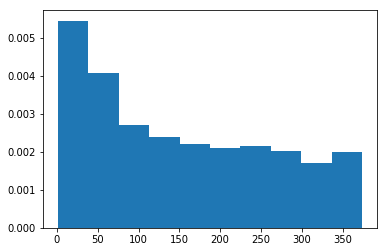

In [28]:
plt.hist(retail_df['Aging'],density='kde')

In [89]:
ret_freq_df=pd.DataFrame(retail_df.groupby('CustomerID')['Aging'].min())
ret_freq_df.reset_index(level=0, inplace=True)

In [90]:
retail_rfm_df=pd.merge(ret_monetory_df,ret_freq_df,on='CustomerID')

In [33]:
retail_rfm_df.columns

Index(['CustomerID', 'count', 'sum', 'mean', 'median', 'min', 'q1', 'q3',
       'q87', 'max', 'std', 'Aging'],
      dtype='object')

In [91]:
retail_rfm_df=retail_rfm_df.drop(columns=['level_0','index'])

KeyError: "['level_0' 'index'] not found in axis"

In [92]:
retail_rfm_df.head(10)

,CustomerID,count,sum,mean,median,min,q1,q3,q87,max,std,Aging
0,12347.0,182,4310.00,23.681319,17.00,5.04,13.2000,25.140,35.4000,249.60,23.289902,3
1,12348.0,31,1797.24,57.975484,41.76,13.20,39.6000,60.000,105.9600,240.00,48.514857,76
2,12349.0,73,1757.55,24.076027,17.70,6.64,14.8500,20.280,30.8544,300.00,34.655913,19
3,12350.0,17,334.40,19.670588,19.80,8.50,15.0000,25.200,25.2000,40.00,7.275538,311
4,12352.0,85,2506.04,29.482824,17.70,9.90,15.0000,19.800,30.1820,376.50,51.687900,37
5,12353.0,4,89.00,22.250000,18.80,11.60,16.1750,24.875,32.0390,39.80,12.215427,205
6,12354.0,58,1079.40,18.610345,16.95,8.50,14.9625,19.900,23.4000,54.08,8.679742,233
7,12355.0,13,459.40,35.338462,25.50,17.70,19.8000,30.000,55.1760,120.00,29.703522,215
8,12356.0,59,2811.43,47.651356,34.80,3.75,19.9800,60.000,79.5768,324.00,48.572297,23
9,12357.0,131,6207.67,47.386794,35.40,10.08,17.3700,68.000,95.8200,237.60,39.564762,34


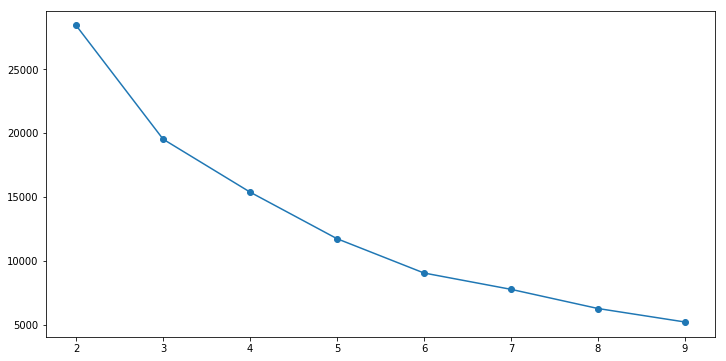

In [24]:
## Lets make use of K means clustering to find the natural clusters.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
retail_rfm_df.isnull().sum()
retail_rfm_df_Z=retail_rfm_df.apply(zscore)
retail_rfm_df_Z=retail_rfm_df_Z.drop(columns=['CustomerID','std'])
from sklearn import metrics
cluster_range = range(2, 10)  
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(retail_rfm_df_Z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  cluster_sil_scores.append(metrics.silhouette_score(retail_rfm_df_Z, labels, metric='euclidean'))

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [25]:
retail_rfm_df_Z.head(5)

,count,sum,mean,median,min,q1,q3,q87,max,Aging
0,0.394391,0.270410,-0.056353,-0.094606,-0.093732,-0.078449,-0.056876,-0.047977,0.174588,-0.900708
1,-0.265564,-0.023432,0.089687,0.116398,-0.001900,0.182676,0.049055,0.102336,0.160420,-0.170369
2,-0.082001,-0.028073,-0.054672,-0.088641,-0.075726,-0.062128,-0.071645,-0.057661,0.248969,-0.740634
3,-0.326752,-0.194496,-0.073432,-0.070745,-0.054793,-0.060645,-0.056694,-0.069706,-0.134744,2.180719
4,-0.029554,0.059455,-0.031648,-0.088641,-0.039038,-0.060645,-0.073103,-0.059093,0.361869,-0.560550


In [ ]:
##

In [26]:
retail_rfm_df.head(5)

,CustomerID,count,sum,mean,median,min,q1,q3,q87,max,std,Aging
0,12347.0,182,4310.00,23.681319,17.00,5.04,13.20,25.14,35.4000,249.6,23.289902,3
1,12348.0,31,1797.24,57.975484,41.76,13.20,39.60,60.00,105.9600,240.0,48.514857,76
2,12349.0,73,1757.55,24.076027,17.70,6.64,14.85,20.28,30.8544,300.0,34.655913,19
3,12350.0,17,334.40,19.670588,19.80,8.50,15.00,25.20,25.2000,40.0,7.275538,311
4,12352.0,85,2506.04,29.482824,17.70,9.90,15.00,19.80,30.1820,376.5,51.687900,37


In [93]:
retail_rfm_df.rename(columns={'Aging':'Recency','count':'Frequency','sum':'Monetory'},inplace=True)
#retail_rfm_df.rename(columns={'Aging':'Recency'},inplace=True)

In [95]:
retail_rfm_df.head(10)

,CustomerID,Frequency,Monetory,mean,median,min,q1,q3,q87,max,std,Recency
0,12347.0,182,4310.00,23.681319,17.00,5.04,13.2000,25.140,35.4000,249.60,23.289902,3
1,12348.0,31,1797.24,57.975484,41.76,13.20,39.6000,60.000,105.9600,240.00,48.514857,76
2,12349.0,73,1757.55,24.076027,17.70,6.64,14.8500,20.280,30.8544,300.00,34.655913,19
3,12350.0,17,334.40,19.670588,19.80,8.50,15.0000,25.200,25.2000,40.00,7.275538,311
4,12352.0,85,2506.04,29.482824,17.70,9.90,15.0000,19.800,30.1820,376.50,51.687900,37
5,12353.0,4,89.00,22.250000,18.80,11.60,16.1750,24.875,32.0390,39.80,12.215427,205
6,12354.0,58,1079.40,18.610345,16.95,8.50,14.9625,19.900,23.4000,54.08,8.679742,233
7,12355.0,13,459.40,35.338462,25.50,17.70,19.8000,30.000,55.1760,120.00,29.703522,215
8,12356.0,59,2811.43,47.651356,34.80,3.75,19.9800,60.000,79.5768,324.00,48.572297,23
9,12357.0,131,6207.67,47.386794,35.40,10.08,17.3700,68.000,95.8200,237.60,39.564762,34


In [94]:
retail_rfm_df_bkp=retail_rfm_df.copy()

In [96]:
f_labels=range(1,5)
f_groups=pd.qcut(retail_rfm_df.Frequency,q=4,labels=f_labels)


In [97]:
m_labels=range(1,5)
m_groups=pd.qcut(retail_rfm_df.Monetory,q=4,labels=m_labels)

In [98]:
r_labels = range(4, 0, -1)
r_groups = pd.qcut(retail_rfm_df.Recency, q = 4, labels = r_labels)

In [99]:
m_groups.values

[4, 4, 4, 2, 4, ..., 1, 1, 1, 4, 4]
Length: 4336
Categories (4, int64): [1 < 2 < 3 < 4]

In [100]:
retail_rfm_df['R']=r_groups.values
retail_rfm_df['F']=f_groups.values
retail_rfm_df['M']=m_groups.values
retail_rfm_df['RFM_Segment'] = retail_rfm_df.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)

In [101]:
retail_rfm_df.head(10)

,CustomerID,Frequency,Monetory,mean,median,min,q1,q3,q87,max,std,Recency,R,F,M,RFM_Segment
0,12347.0,182,4310.00,23.681319,17.00,5.04,13.2000,25.140,35.4000,249.60,23.289902,3,4,4,4,444
1,12348.0,31,1797.24,57.975484,41.76,13.20,39.6000,60.000,105.9600,240.00,48.514857,76,2,2,4,224
2,12349.0,73,1757.55,24.076027,17.70,6.64,14.8500,20.280,30.8544,300.00,34.655913,19,3,3,4,334
3,12350.0,17,334.40,19.670588,19.80,8.50,15.0000,25.200,25.2000,40.00,7.275538,311,1,1,2,112
4,12352.0,85,2506.04,29.482824,17.70,9.90,15.0000,19.800,30.1820,376.50,51.687900,37,3,3,4,334
5,12353.0,4,89.00,22.250000,18.80,11.60,16.1750,24.875,32.0390,39.80,12.215427,205,1,1,1,111
6,12354.0,58,1079.40,18.610345,16.95,8.50,14.9625,19.900,23.4000,54.08,8.679742,233,1,3,3,133
7,12355.0,13,459.40,35.338462,25.50,17.70,19.8000,30.000,55.1760,120.00,29.703522,215,1,1,2,112
8,12356.0,59,2811.43,47.651356,34.80,3.75,19.9800,60.000,79.5768,324.00,48.572297,23,3,3,4,334
9,12357.0,131,6207.67,47.386794,35.40,10.08,17.3700,68.000,95.8200,237.60,39.564762,34,3,4,4,344


In [41]:
str(r_groups.values)+str(f_groups.values)

'[4, 2, 3, 1, 3, ..., 1, 1, 4, 4, 3]\nLength: 4336\nCategories (4, int64): [4 < 3 < 2 < 1][4, 2, 3, 1, 3, ..., 1, 1, 1, 4, 3]\nLength: 4336\nCategories (4, int64): [1 < 2 < 3 < 4]'

In [102]:
retail_rfm_df['RFM_Score']=retail_rfm_df[['R','F','M']].sum(axis=1)

In [103]:
retail_rfm_df.head(5)

,CustomerID,Frequency,Monetory,mean,median,min,q1,q3,q87,max,std,Recency,R,F,M,RFM_Segment,RFM_Score
0,12347.0,182,4310.00,23.681319,17.00,5.04,13.20,25.14,35.4000,249.6,23.289902,3,4,4,4,444,12.0
1,12348.0,31,1797.24,57.975484,41.76,13.20,39.60,60.00,105.9600,240.0,48.514857,76,2,2,4,224,8.0
2,12349.0,73,1757.55,24.076027,17.70,6.64,14.85,20.28,30.8544,300.0,34.655913,19,3,3,4,334,10.0
3,12350.0,17,334.40,19.670588,19.80,8.50,15.00,25.20,25.2000,40.0,7.275538,311,1,1,2,112,4.0
4,12352.0,85,2506.04,29.482824,17.70,9.90,15.00,19.80,30.1820,376.5,51.687900,37,3,3,4,334,10.0


In [104]:
rfm_class_labels=['Bronze','Silver','Gold','Platinum']
rfm_cust_labels=pd.qcut(retail_rfm_df.RFM_Score,q=4,labels=rfm_class_labels)

In [105]:
retail_rfm_df['Customer_Class']=rfm_cust_labels.values

In [106]:
retail_rfm_df.head(5)

,CustomerID,Frequency,Monetory,mean,median,min,q1,q3,q87,max,std,Recency,R,F,M,RFM_Segment,RFM_Score,Customer_Class
0,12347.0,182,4310.00,23.681319,17.00,5.04,13.20,25.14,35.4000,249.6,23.289902,3,4,4,4,444,12.0,Platinum
1,12348.0,31,1797.24,57.975484,41.76,13.20,39.60,60.00,105.9600,240.0,48.514857,76,2,2,4,224,8.0,Gold
2,12349.0,73,1757.55,24.076027,17.70,6.64,14.85,20.28,30.8544,300.0,34.655913,19,3,3,4,334,10.0,Gold
3,12350.0,17,334.40,19.670588,19.80,8.50,15.00,25.20,25.2000,40.0,7.275538,311,1,1,2,112,4.0,Bronze
4,12352.0,85,2506.04,29.482824,17.70,9.90,15.00,19.80,30.1820,376.5,51.687900,37,3,3,4,334,10.0,Gold


In [110]:
retail_rfm_df[retail_rfm_df['Customer_Class']=='Silver'].head(10)


,CustomerID,Frequency,Monetory,mean,median,min,q1,q3,q87,max,std,Recency,R,F,M,RFM_Segment,RFM_Score,Customer_Class
6,12354.0,58,1079.40,18.610345,16.950,8.50,14.9625,19.90,23.400,54.08,8.679742,233,1,3,3,133,7.0,Silver
15,12363.0,23,552.00,24.000000,17.400,13.20,14.5500,29.94,30.000,69.36,15.751239,110,2,2,2,222,6.0,Silver
18,12367.0,11,168.90,15.354545,13.500,9.90,10.5000,20.70,23.400,23.40,5.648958,5,4,1,1,411,6.0,Silver
24,12375.0,17,457.50,26.911765,20.800,8.50,20.8000,40.00,41.472,62.40,14.672205,11,4,1,2,412,7.0,Silver
25,12377.0,77,1628.12,21.144416,16.500,5.04,10.0800,30.00,35.400,80.00,15.531662,316,1,3,3,133,7.0,Silver
27,12379.0,40,852.24,21.306000,16.970,8.50,15.3000,23.40,30.000,76.20,12.201030,82,2,2,3,223,7.0,Silver
31,12384.0,27,585.27,21.676667,17.000,6.64,15.0000,19.85,24.582,80.00,17.295303,29,3,2,2,322,7.0,Silver
34,12390.0,32,549.84,17.182500,16.775,7.80,12.0750,19.80,22.422,45.00,7.172142,80,2,2,2,222,6.0,Silver
37,12394.0,27,1272.48,47.128889,19.800,6.80,15.0600,31.60,122.692,266.24,64.924589,64,2,2,3,223,7.0,Silver
44,12403.0,5,427.70,85.540000,83.000,9.90,36.0000,132.80,148.736,166.00,64.979597,50,3,1,2,312,6.0,Silver


In [111]:
retail_rfm_df['Customer_Class'].value_counts()

Gold        1299
Bronze      1287
Silver       915
Platinum     835
Name: Customer_Class, dtype: int64

In [94]:
retail_rfm_df[retail_rfm_df['Customer_Class']=='Platinum'].sort_values(by='RFM_Score')

,CustomerID,Frequency,Monetory,mean,median,min,q1,q3,q87,max,std,Recency,R,F,M,RFM_Score,Customer Class,RFM_Segment,Customer_Class
1978,15058.0,276,2124.99,7.699239,3.750,0.42,1.6500,9.9500,16.1625,46.20,8.812129,26,3,4,4,11.0,Platinum,344,Platinum
3395,16979.0,89,1852.00,20.808989,16.350,0.58,9.9000,25.2000,33.9408,175.20,22.639495,4,4,3,4,11.0,Platinum,434,Platinum
1603,14530.0,216,2925.91,13.545880,10.200,0.84,7.5000,17.0625,20.4000,107.10,11.607812,26,3,4,4,11.0,Platinum,344,Platinum
1599,14525.0,291,4332.20,14.887285,7.950,0.42,4.1500,16.9750,25.5000,244.80,24.714518,20,3,4,4,11.0,Platinum,344,Platinum
1598,14524.0,203,1867.68,9.200394,5.100,0.57,2.9500,12.1500,16.8590,102.00,11.657891,32,3,4,4,11.0,Platinum,344,Platinum
3402,16987.0,129,1625.05,12.597287,8.250,1.25,4.2000,15.9000,21.0000,187.00,18.879158,4,4,4,3,11.0,Platinum,443,Platinum
3419,17015.0,217,1842.56,8.491060,6.600,0.42,2.5500,11.9000,17.0000,35.40,7.313074,29,3,4,4,11.0,Platinum,344,Platinum
1581,14502.0,624,2470.67,3.959407,2.950,0.19,1.4800,4.9500,6.9507,89.55,5.816503,20,3,4,4,11.0,Platinum,344,Platinum
1577,14498.0,193,1957.32,10.141554,5.900,0.42,3.7500,11.5600,16.5000,170.00,15.683628,43,3,4,4,11.0,Platinum,344,Platinum
1564,14482.0,144,2068.15,14.362153,6.960,0.21,2.0475,15.0750,20.8000,179.00,28.963324,19,3,4,4,11.0,Platinum,344,Platinum
